# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



Make                 0
Make_Year            0
Color                0
Body_Type            0
Mileage_Run          0
No_of_Owners         0
Seating_Capacity     0
Fuel_Type            0
Transmission         0
Transmission_Type    0
Price                0
dtype: int64
         Make_Year   Mileage_Run  Seating_Capacity         Price
count   976.000000    976.000000        976.000000  9.760000e+02
mean   2016.963115  41571.195697          5.095287  7.410195e+05
std       2.818742  24390.995134          0.446224  3.673234e+05
min    2011.000000   1117.000000          4.000000  1.880000e+05
25%    2015.000000  22676.750000          5.000000  4.757500e+05
50%    2017.000000  37570.500000          5.000000  6.665000e+05
75%    2019.000000  57421.250000          5.000000  8.830000e+05
max    2022.000000  99495.000000          8.000000  2.941000e+06
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtyp

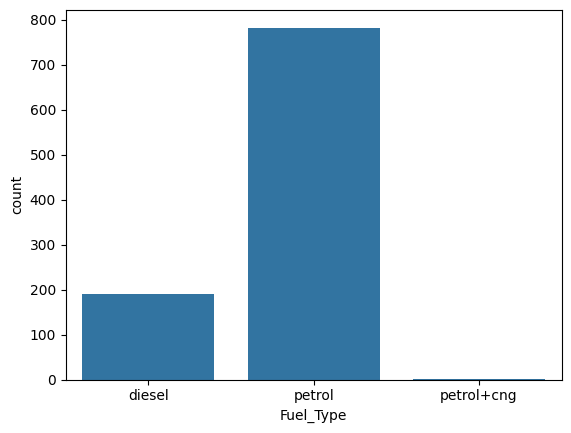

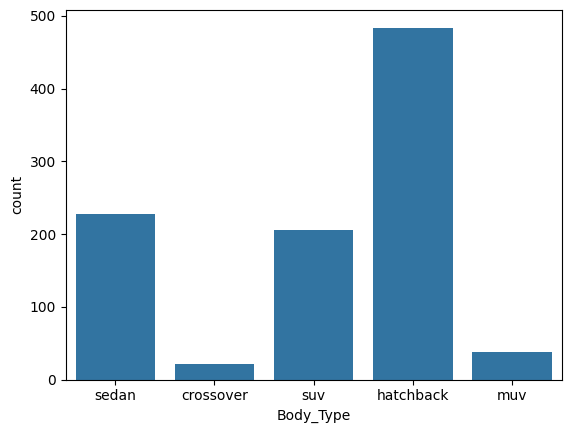

In [2]:
#1
import pandas as pd
import numpy as np

data = pd.read_csv('/content/cars_hw.csv')
data_cleaned = data.drop(['Unnamed: 0'], axis=1)

# EDA
print(data_cleaned.isnull().sum())

print(data_cleaned.describe())
print(data_cleaned.info())


import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=data_cleaned, x='Fuel_Type')
plt.show()
sns.countplot(data=data_cleaned, x='Body_Type')
plt.show()

In [9]:
#2
data_encoded = pd.get_dummies(data_cleaned, columns=['Make', 'Color', 'Body_Type', 'Fuel_Type', 'Transmission_Type', 'Transmission'], drop_first=True)

data_encoded['No_of_Owners'] = data_encoded['No_of_Owners'].str.replace('st|nd|rd|th', '', regex=True).astype(int)

In [10]:
#3
from sklearn.model_selection import train_test_split
y = data_encoded['Price']
X = data_encoded.drop('Price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(780, 44) (196, 44) (780,) (196,)


In [12]:
#4
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# linear regression model
r_model = LinearRegression()
r_model.fit(X_train, y_train)

y_train_pred = r_model.predict(X_train)
y_test_pred = r_model.predict(X_test)

# RMSE and R^2
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)

test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training RMSE: {train_rmse}, R^2: {train_r2}")
print(f"Test RMSE: {test_rmse}, R^2: {test_r2}")

Training RMSE: 142154.1934347692, R^2: 0.8552247578997089
Test RMSE: 143815.30276718942, R^2: 0.8196717007174041


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [13]:
#5
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# linear regression
newr_model = LinearRegression()
newr_model.fit(X_train_poly, y_train)

y_train_pred_new = newr_model.predict(X_train_poly)
y_test_pred_new = newr_model.predict(X_test_poly)

train_rmse_new = mean_squared_error(y_train, y_train_pred_new, squared=False)
train_r2_new = r2_score(y_train, y_train_pred_new)

test_rmse_new = mean_squared_error(y_test, y_test_pred_new, squared=False)
test_r2_new = r2_score(y_test, y_test_pred_new)

# Print the results
print(f"Training RMSE: {train_rmse_new}, R^2: {train_r2_new}")
print(f"Test RMSE: {test_rmse_new}, R^2: {test_r2_new}")


Training RMSE: 74611.77048251644, R^2: 0.96011683272951
Test RMSE: 2746059.9412090005, R^2: -64.7466626473214


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


6. The first model, a simple linear regression without transformations or interactions, performed reasonably well. It achieved an RMSE of approximately 142,154 on the training set and 143,815 on the test set, with R^2 values of 0.855 and 0.819, respectively. This showed that the model could predict prices moderately well. However, the new model, which included polynomial transformations and interactions, performed significantly better on the training set, with an RMSE of 74,611 and R^2 of 0.960. However, this model drastically overfit the training data, leading to a test RMSE of 2,745,938 and R^2 of -64.74.